In [ ]:
# Things to do
# Clean Data
# Build a model (1 for each)

CreditScore: t-statistic=-2.63, p-value=8.46e-03
Geography: t-statistic=3.86, p-value=1.15e-04
Gender: t-statistic=-10.69, p-value=3.27e-26
Age: t-statistic=30.42, p-value=4.71e-179
Tenure: t-statistic=-1.38, p-value=1.66e-01
Balance: t-statistic=12.47, p-value=6.32e-35
NumOfProducts: t-statistic=-3.70, p-value=2.19e-04
HasCrCard: t-statistic=-0.71, p-value=4.78e-01
IsActiveMember: t-statistic=-16.13, p-value=2.38e-56
EstimatedSalary: t-statistic=1.20, p-value=2.29e-01


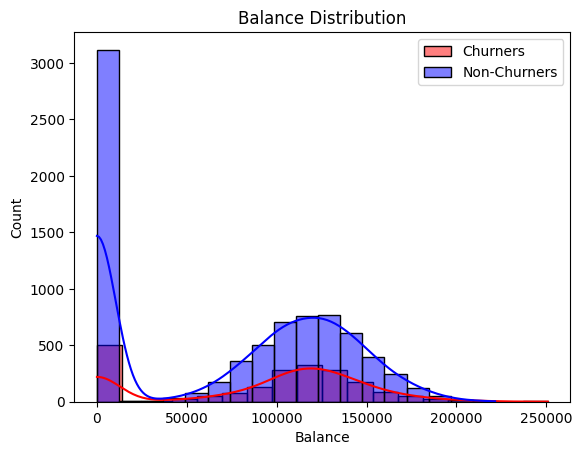

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

           Feature  Importance
3              Age    0.239934
9  EstimatedSalary    0.147069
0      CreditScore    0.144104
5          Balance    0.141194
6    NumOfProducts    0.129134
4           Tenure    0.081958
8   IsActiveMember    0.039596
1        Geography    0.038467
7        HasCrCard    0.019583
2           Gender    0.018959


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('bank_churn.csv')  # Replace with your file path

# Encode categorical variables
data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes

# Separate features and target
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Compare churners and non-churners
churners = data[data['Exited'] == 1]
non_churners = data[data['Exited'] == 0]

# Statistical tests for numerical features
for col in X.columns:
    stat, p_val = ttest_ind(churners[col], non_churners[col], equal_var=False)
    print(f"{col}: t-statistic={stat:.2f}, p-value={p_val:.2e}")

# Example: Plot distributions for balance
sns.histplot(churners['Balance'], color='red', label='Churners', kde=True)
sns.histplot(non_churners['Balance'], color='blue', label='Non-Churners', kde=True)
plt.legend()
plt.title('Balance Distribution')
plt.show()

# Predictive Modeling: Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


Churn Distribution:
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<ipython-input-17-583ef8c554ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")


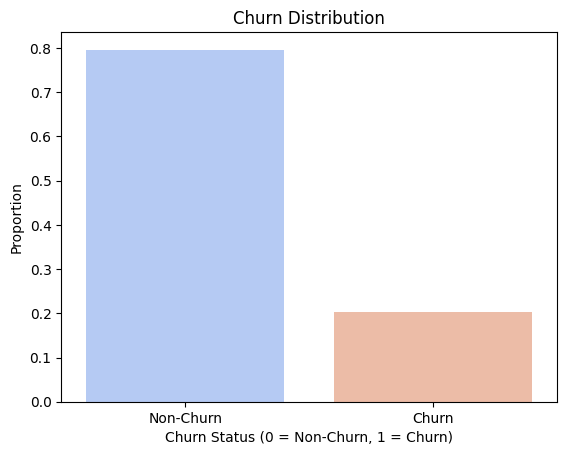

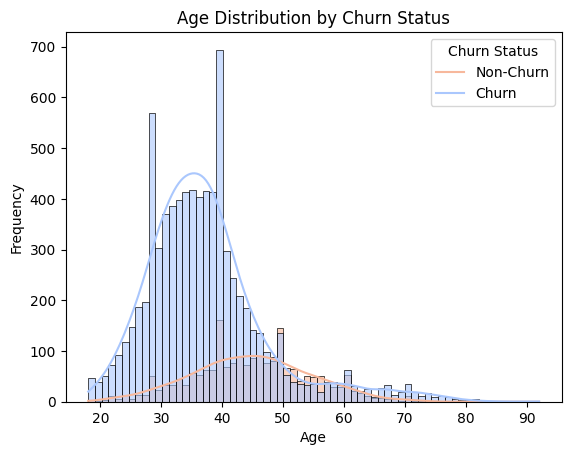

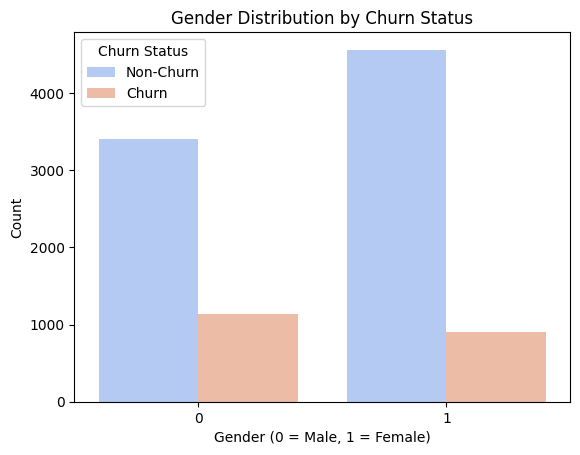

<ipython-input-17-583ef8c554ea>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exited', y='NumOfProducts', palette="coolwarm")


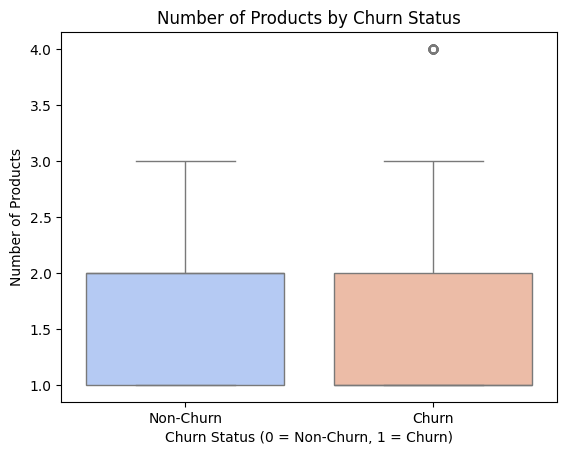

<ipython-input-17-583ef8c554ea>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exited', y='Balance', palette="coolwarm")


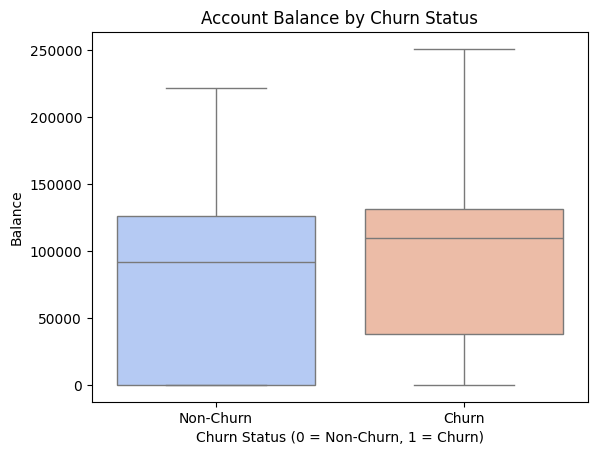

In [ ]:
# Churn distribution (Exited = 1 means churned)
churn_counts = data['Exited'].value_counts(normalize=True)
print("Churn Distribution:\n", churn_counts)

# Plot churn distribution
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")
plt.title('Churn Distribution')
plt.xlabel('Churn Status (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.show()

# Distribution of Age by Churn Status
sns.histplot(data=data, x='Age', hue='Exited', kde=True, palette="coolwarm", alpha=0.6)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Non-Churn', 'Churn'])
plt.show()

# Gender distribution by Churn Status
sns.countplot(data=data, x='Gender', hue='Exited', palette="coolwarm")
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Non-Churn', 'Churn'])
plt.show()

# Product usage distribution by Churn Status
sns.boxplot(data=data, x='Exited', y='NumOfProducts', palette="coolwarm")
plt.title('Number of Products by Churn Status')
plt.xlabel('Churn Status (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Number of Products')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.show()

# Balance distribution by Churn Status
sns.boxplot(data=data, x='Exited', y='Balance', palette="coolwarm")
plt.title('Account Balance by Churn Status')
plt.xlabel('Churn Status (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.show()


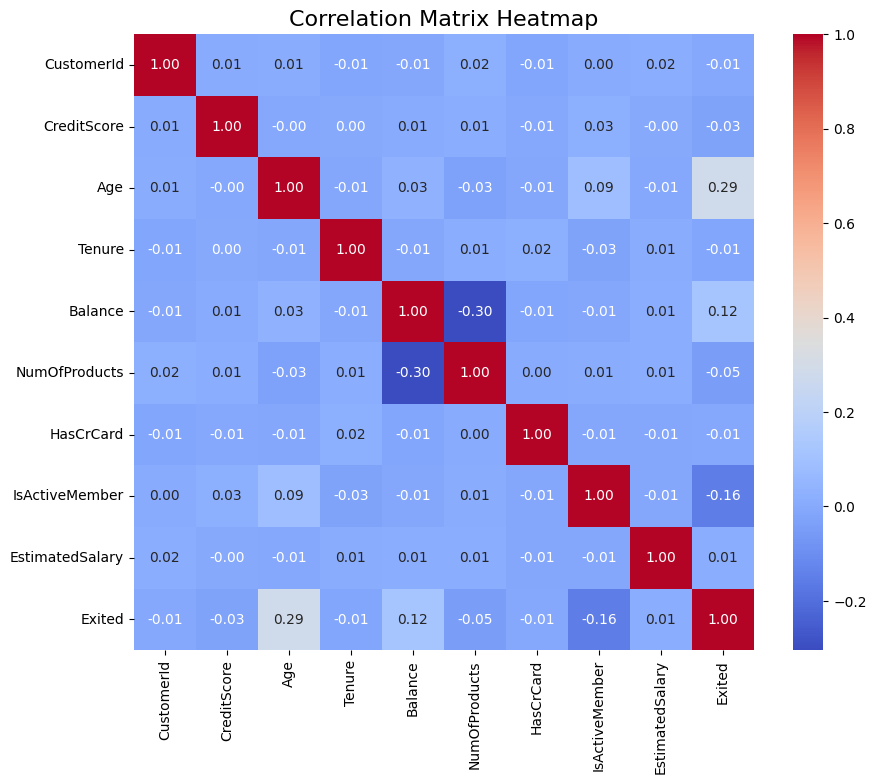

In [ ]:

# 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = '/content/Bank_Churn.csv'  # CSV 파일 경로
data = pd.read_csv(file_path)

# 범주형 열 자동 감지 후 변환
categorical_cols = data.select_dtypes(include=['object']).columns
data_dummy = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 2. 숫자형 변수 선택
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # 숫자형 열만 선택

# 3. 상관 행렬 계산
corr_matrix = numeric_data.corr()  # 상관 계수 계산

# 4. 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(
    corr_matrix,
    annot=True,  # 상관 계수 값 표시
    fmt=".2f",   # 값 표시 형식 (소수점 2자리)
    cmap='coolwarm',  # 색상 팔레트
    cbar=True     # 컬러 바 표시
)
plt.title("Correlation Matrix Heatmap", fontsize=16)  # 제목 추가
plt.show()




Geography
0    0.161548
1    0.324432
2    0.166734
Name: Exited, dtype: float64


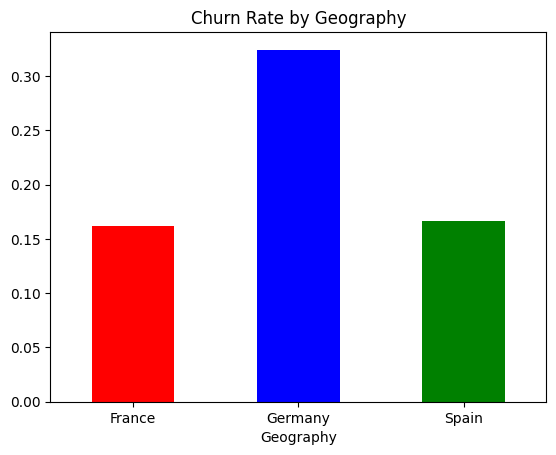

ANOVA Test: F-statistic=958.43, p-value=0.00e+00


In [ ]:
from scipy.stats import f_oneway

# Churn rate by geography
churn_rate_by_geo = data.groupby('Geography')['Exited'].mean()
print(churn_rate_by_geo)

# Visualize churn rates
churn_rate_by_geo.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Churn Rate by Geography')
plt.xticks([0, 1, 2], ['France', 'Germany', 'Spain'], rotation=0)
plt.show()

# ANOVA test for Balance by Geography
anova_stat, p_val = f_oneway(
    data[data['Geography'] == 0]['Balance'],
    data[data['Geography'] == 1]['Balance'],
    data[data['Geography'] == 2]['Balance']
)
print(f"ANOVA Test: F-statistic={anova_stat:.2f}, p-value={p_val:.2e}")


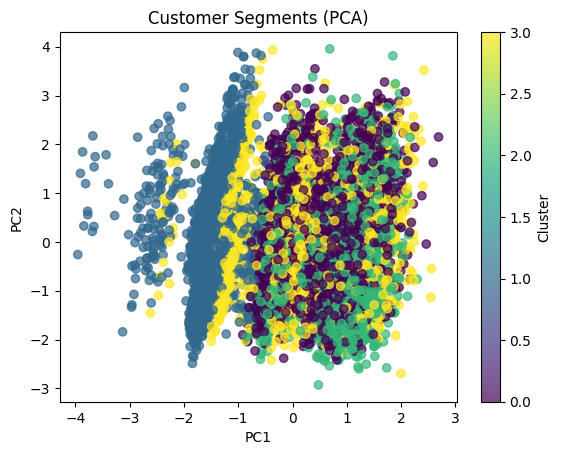

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segments (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Cluster profiles
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)


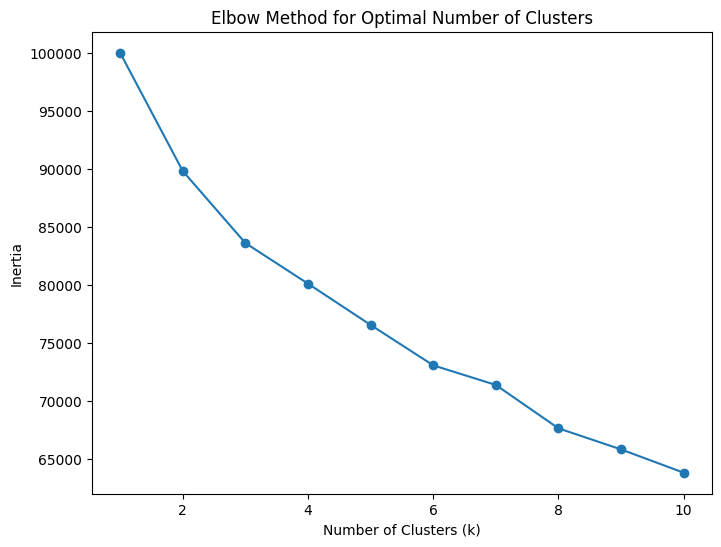

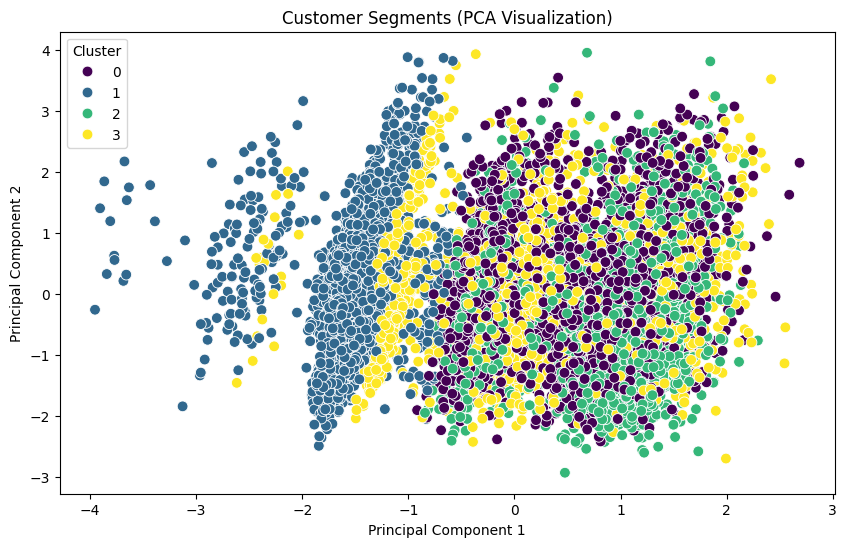

Cluster Profiles:
            CustomerId  CreditScore        Age    Tenure        Balance  \
Cluster                                                                  
0        1.569082e+07   650.592581  39.685641  4.929325  103679.746658   
1        1.569068e+07   650.840863  37.984534  5.075295    9411.432112   
2        1.569022e+07   649.755751  39.240903  4.984944  105665.965926   
3        1.569228e+07   650.964444  38.502716  5.098765   81422.771284   

         NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Cluster                                                                       
0             1.266390   0.701311        0.494404    100726.031871  0.291653  
1             2.121286   0.715100        0.530729     99748.752515  0.118030  
2             1.128816   0.706399        0.501464     99839.175186  0.229611  
3             1.694321   0.699259        0.544198     99819.231778  0.141235  


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bank_churn.csv')  # Replace with your dataset file path

# Preprocessing for clustering
# Drop irrelevant columns and encode categorical variables
data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)  # Keep only numerical features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
# Define the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal k (based on the elbow plot) and fit K-Means
optimal_k = 4  # Example, adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=60)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Ensure only numeric columns are included in the analysis
numeric_data = data.select_dtypes(include=[float, int])

# Include the cluster column for grouping
numeric_data['Cluster'] = data['Cluster']

# Compute cluster profiles
cluster_profiles = numeric_data.groupby('Cluster').mean()

print("Cluster Profiles:\n", cluster_profiles)



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Step 1: Load dataset
data = pd.read_csv('bank_churn.csv')  # Replace with your dataset file path

# Step 2: Data Preprocessing
# Encode categorical variables
le_geography = LabelEncoder()
le_gender = LabelEncoder()
data['Geography'] = le_geography.fit_transform(data['Geography'])
data['Gender'] = le_gender.fit_transform(data['Gender'])

# Define features (X) and target (y)
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)  # Drop irrelevant columns
y = data['Exited']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Step 4: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Step 5: Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000

Accuracy: 0.805
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.76      0.24      0.36       407

    accuracy                           0.83      2000
   macro avg       0.79      0.61      0.63      2000
weighted avg       0.82      0.83      0.79      2000

Accuracy: 0.829
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.80      0.37      0.51       407

    accuracy                    

In [ ]:
# Ivy part
preprocessed_data = pd.read_csv('preprocessed_data.csv')
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Split the data into features (X) and target (y)
X = preprocessed_data.drop('Exited', axis=1)
y = preprocessed_data['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    # Store results
    model_results[model_name] = {
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }
    return model

# Train and evaluate models
# Random Forest
rf_model = train_and_evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")

# Logistic Regression
lr_model = train_and_evaluate_model(LogisticRegression(max_iter=500, random_state=42), "Logistic Regression")

# Naive Bayes
nb_model = train_and_evaluate_model(GaussianNB(), "Naive Bayes")

# Decision Tree
dt_model = train_and_evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")

# Display results for each model
for model_name, results in model_results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {results['Accuracy']}")
    #print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print("\n")


--- Random Forest ---
Accuracy: 0.8645
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



--- Logistic Regression ---
Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



--- Naive Bayes ---
Accuracy: 0.7865
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.36      0.06      0.11

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Ivy part
# # SMOTE
# Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Split the data into features (X) and target (y)
X = preprocessed_data.drop('Exited', axis=1)
y = preprocessed_data['Exited']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Dictionary to store model results
model_results_smote = {}

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    # Store results
    model_results_smote[model_name] = {
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }
    return model

# Train and evaluate models
# Random Forest
rf_model_smote = train_and_evaluate_model(RandomForestClassifier(random_state=42), "Random Forest (SMOTE)")

# Logistic Regression
lr_model_smote = train_and_evaluate_model(LogisticRegression(max_iter=500, random_state=42), "Logistic Regression (SMOTE)")

# Naive Bayes
nb_model_smote = train_and_evaluate_model(GaussianNB(), "Naive Bayes (SMOTE)")

# Decision Tree
dt_model_smote = train_and_evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree (SMOTE)")

# Display results for each model
for model_name, results in model_results_smote.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Random Forest (SMOTE) ---
Accuracy: 0.8612680477087257
Confusion Matrix:
[[1393  200]
 [ 242 1351]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1593
           1       0.87      0.85      0.86      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



--- Logistic Regression (SMOTE) ---
Accuracy: 0.7727558066541117
Confusion Matrix:
[[1239  354]
 [ 370 1223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1593
           1       0.78      0.77      0.77      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



--- Naive Bayes (SMOTE) ---
Accuracy: 0.7115505335844319
Confusion Matrix:
[[1084 

In [ ]:
#Jess
# L1 regularization on logistic regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

preprocessed_data = pd.read_csv('/content/preprocessed_data.csv')
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Split the data into features (X) and target (y)
X = preprocessed_data.drop('Exited', axis=1)
y = preprocessed_data['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    # Store results
    model_results[model_name] = {
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }
    return model

# Logistic Regression with L1 Regularization
lr_l1_model = train_and_evaluate_model(
    LogisticRegression(
        penalty='l1',  # Use L1 regularization
        solver='liblinear',  # Required solver for L1 regularization
        max_iter=500,
        random_state=42
    ),
    "Logistic Regression (L1 Regularization)"
)


# Train and evaluate models
# Random Forest
rf_model = train_and_evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")

# Logistic Regression
lr_l1_model = train_and_evaluate_model(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, random_state=42),
    "Logistic Regression (L1 Regularization)"
)

# Naive Bayes
nb_model = train_and_evaluate_model(GaussianNB(), "Naive Bayes")
from sklearn.model_selection import GridSearchCV

# Decision Tree with Pruning
dt_pruned_model = train_and_evaluate_model(
    DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Decision Tree (Pruned)"
)


# Display results for each model
for model_name, results in model_results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {results['Accuracy']}")
    #print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print("\n")


--- Logistic Regression (L1 Regularization) ---
Accuracy: 0.8085
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



--- Random Forest ---
Accuracy: 0.8645
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



--- Naive Bayes ---
Accuracy: 0.7865
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.36

In [ ]:
#Jess
# PCA for Random Forest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Number of principal components to retain (e.g., retain 95% variance or a fixed number of components)
n_components = 10  # Adjust based on your dataset

# Create a pipeline with PCA and Random Forest
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("--- Random Forest with PCA ---")
print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")




--- Random Forest with PCA ---
Accuracy: 0.8545
Confusion Matrix:
[[1519   74]
 [ 217  190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.47      0.57       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
#Jess
# PCA for Naive Bayes
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Number of principal components to retain
n_components = 10  # Adjust based on dataset

# Create a pipeline with PCA and Naive Bayes
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components, random_state=42)),
    ('nb', GaussianNB())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("--- Naive Bayes with PCA ---")
print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


--- Naive Bayes with PCA ---
Accuracy: 0.783
Confusion Matrix:
[[1547   46]
 [ 388   19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.29      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    """Plot confusion matrix as a heatmap."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


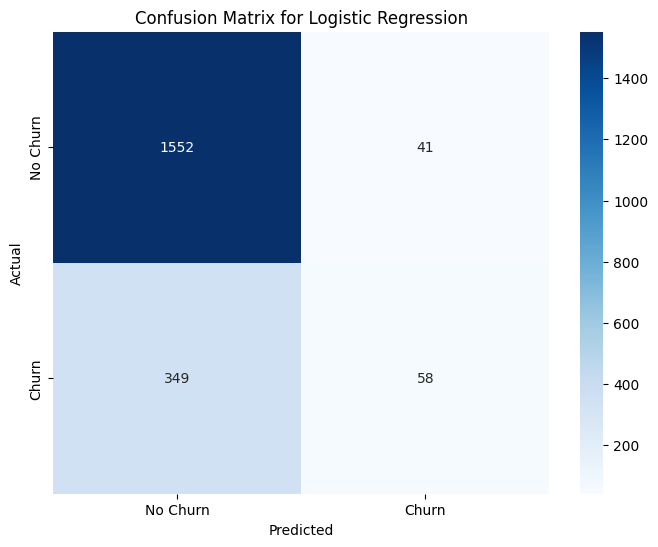

<ipython-input-10-9f71743c88c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


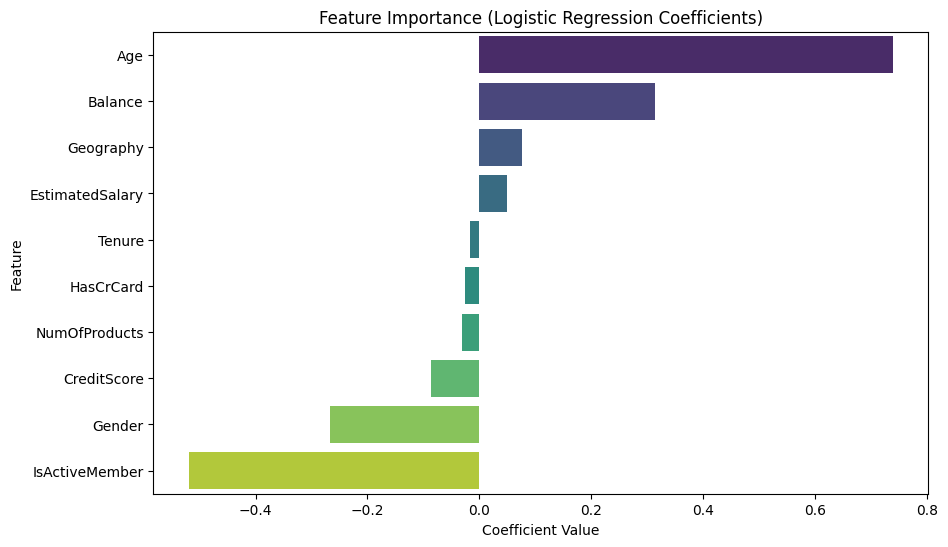

In [ ]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# Logistic Regression Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


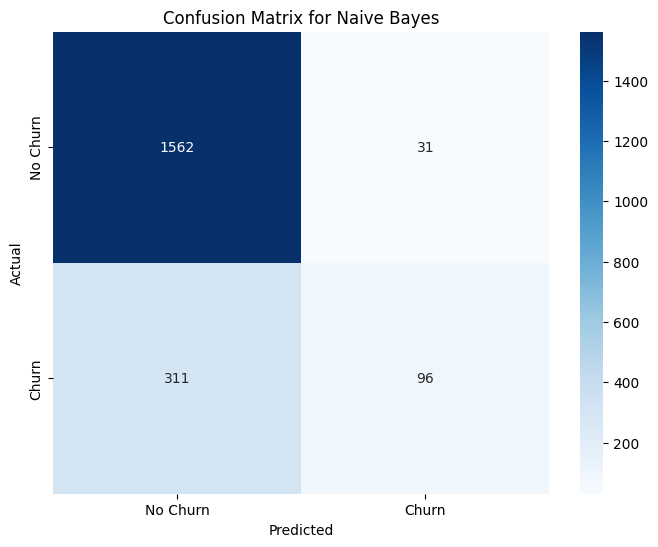

In [ ]:
# Confusion Matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# Naive Bayes does not provide direct feature importance visualization.
# You can interpret probabilities, but this is not visualized in standard models.


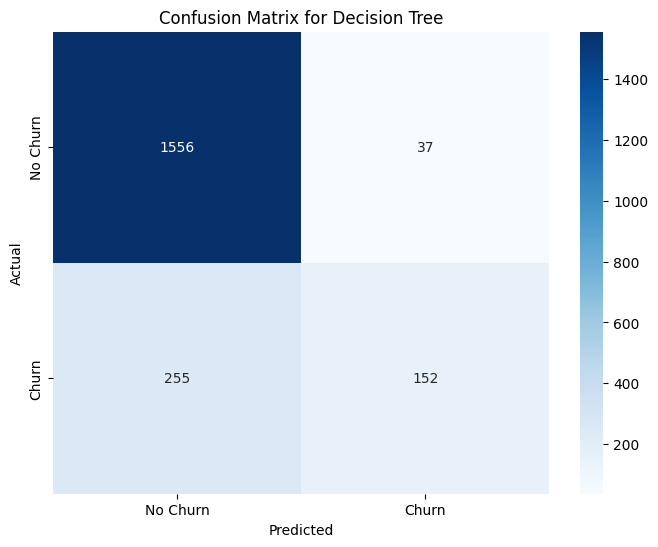

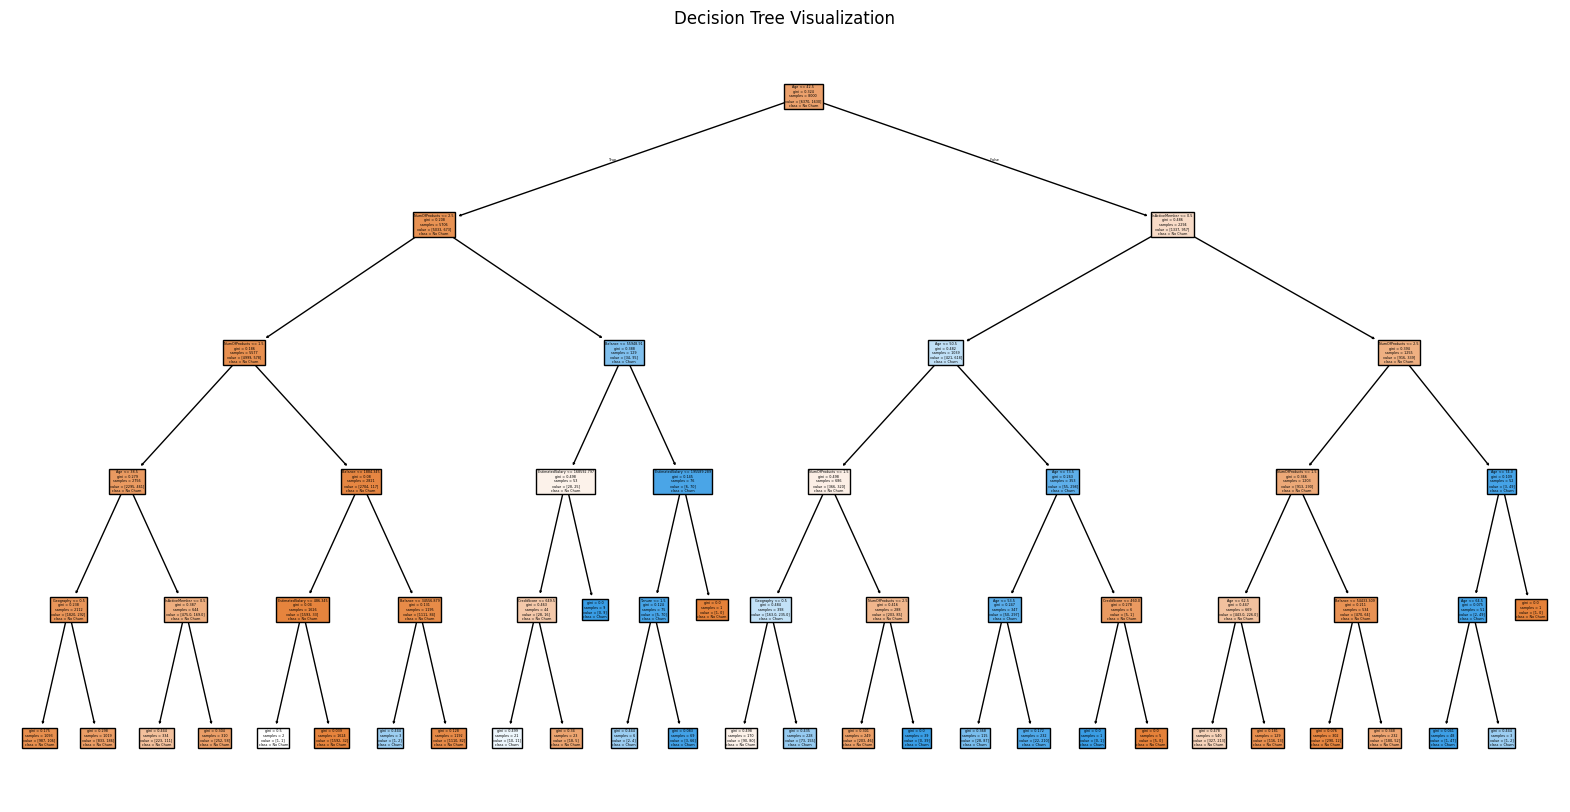

<ipython-input-12-8dbb6af38d34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='coolwarm')


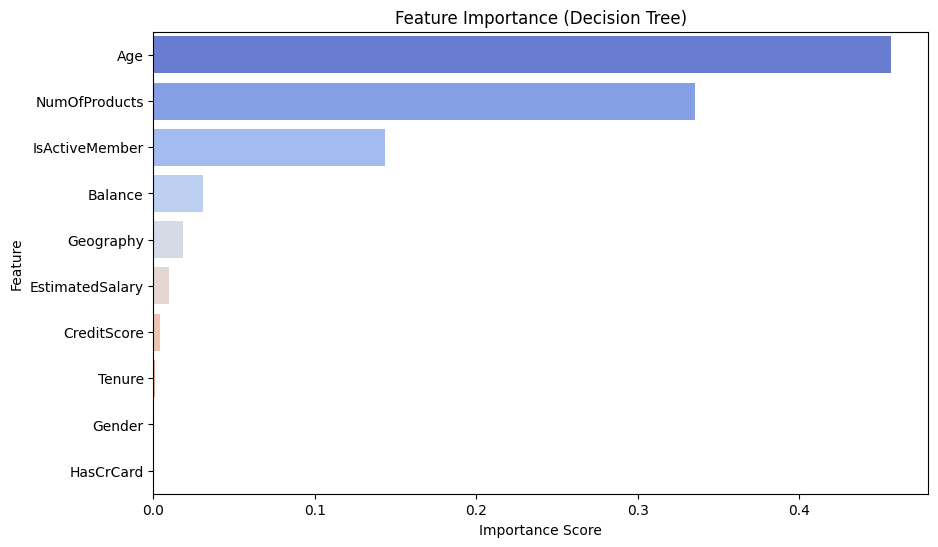

In [ ]:
from sklearn.tree import plot_tree

# Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importance for Decision Tree
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='coolwarm')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Calculate mean and variance of 'CreditScore' for each class in the target variable 'Exited'
credit_score_stats = data.groupby('Exited')['CreditScore'].agg(['mean', 'var'])

class_probabilities = data['Exited'].value_counts(normalize=True).rename("P(Class)").sort_index()
credit_score_stats['P(Class)'] = class_probabilities

credit_score_stats

,mean,var,P(Class)
Exited,,,
0,651.853196,9149.656542,0.7963
1,645.351497,10064.403894,0.2037


In [ ]:
#P(Geography|Exited)
geo_exited_counts = data.groupby(['Geography', 'Exited']).size()
exited_counts = data['Exited'].value_counts()
geo_given_exited = geo_exited_counts / exited_counts
geo_given_exited_table = geo_given_exited.unstack()

print(geo_given_exited_table)

Exited            0         1
Geography                    
0          0.527942  0.397644
1          0.212859  0.399607
2          0.259199  0.202749


In [ ]:
#P(Balance|Exited)
import numpy as np
def gaussian_probability(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

balance_stats = data.groupby('Exited')['Balance'].agg(['mean', 'var'])

#Specify a balance value for which to calculate the probabilities
balance_value = 50000  # Example balance value

balance_given_exited = {
    class_label: gaussian_probability(balance_value, row['mean'], row['var'])
    for class_label, row in balance_stats.iterrows()
}

print(balance_given_exited)

{0: 5.945340348787947e-06, 1: 5.333952035061307e-06}


In [ ]:
#P(Age|Exited)
import numpy as np
def gaussian_probability(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

age_stats = data.groupby('Exited')['Age'].agg(['mean', 'var'])

#Specify an age value for which to calculate the probabilities
age_value = 40  # Example age value

age_given_exited = {
    class_label: gaussian_probability(age_value, row['mean'], row['var'])
    for class_label, row in age_stats.iterrows()
}

print(age_given_exited)

{0: 0.038130613680163516, 1: 0.03614527361626094}


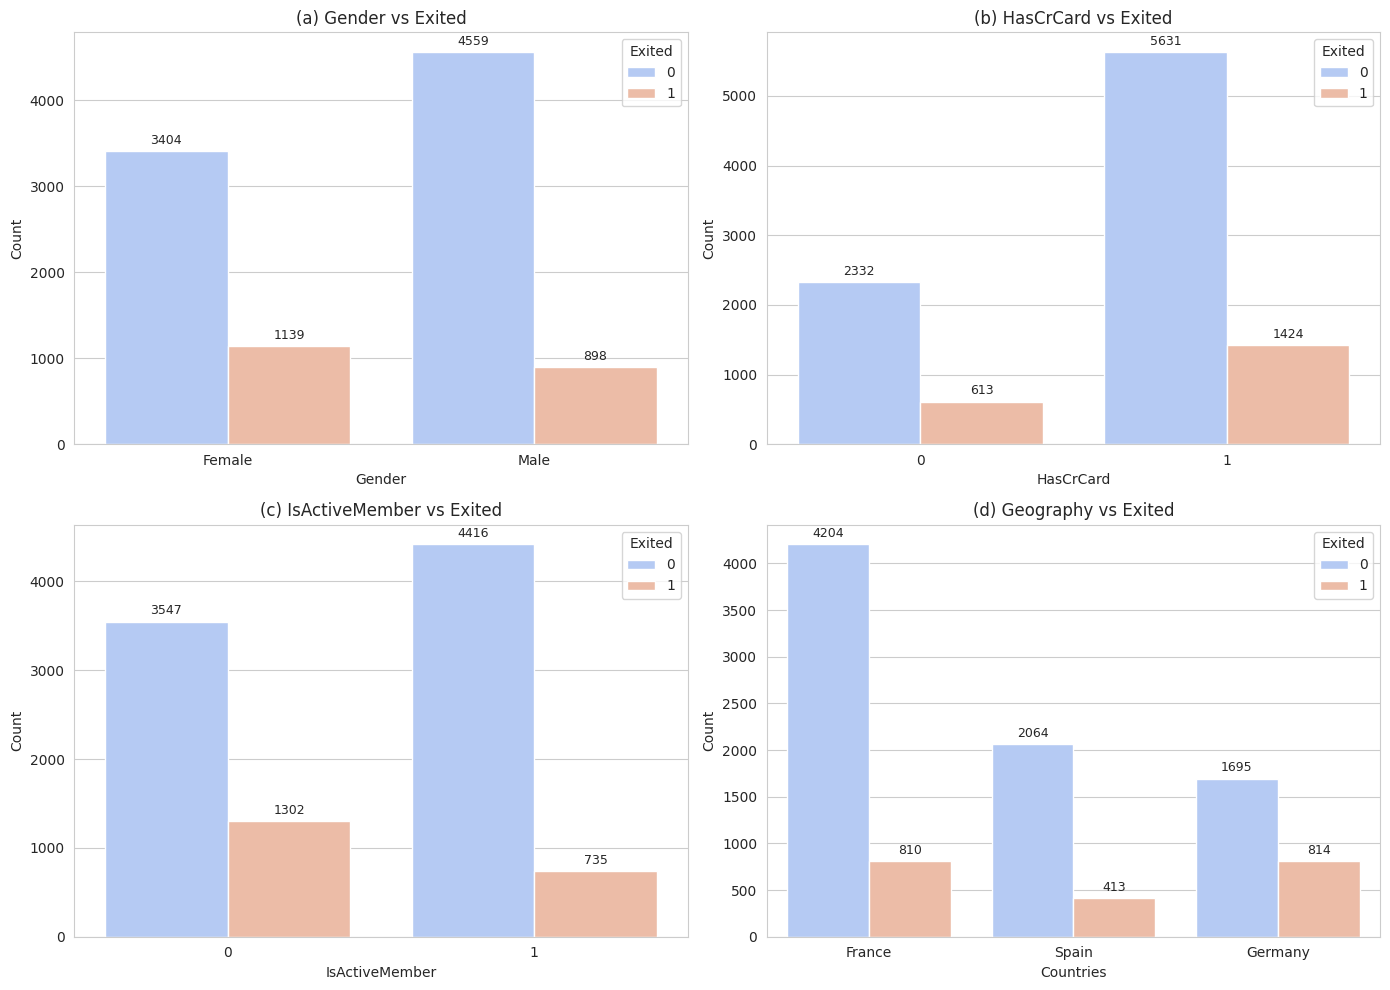

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = '/content/Bank_Churn.csv'  # 적절한 파일 경로를 입력하세요
data = pd.read_csv(file_path)

# 2. 그래프 스타일 설정
sns.set_style("whitegrid")

# 3. 그래프 생성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 서브플롯

# 숫자 값 표시 함수 정의
def add_counts(ax):
    """막대 위에 숫자 값 추가"""
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

# (a) Gender vs Exited
ax = sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[0, 0], palette='coolwarm')
add_counts(ax)
axes[0, 0].set_title("(a) Gender vs Exited")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# (b) HasCrCard vs Exited
ax = sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axes[0, 1], palette='coolwarm')
add_counts(ax)
axes[0, 1].set_title("(b) HasCrCard vs Exited")
axes[0, 1].set_xlabel("HasCrCard")
axes[0, 1].set_ylabel("Count")

# (c) IsActiveMember vs Exited
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axes[1, 0], palette='coolwarm')
add_counts(ax)
axes[1, 0].set_title("(c) IsActiveMember vs Exited")
axes[1, 0].set_xlabel("IsActiveMember")
axes[1, 0].set_ylabel("Count")

# (d) Geography (Countries) vs Exited
ax = sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[1, 1], palette='coolwarm')
add_counts(ax)
axes[1, 1].set_title("(d) Geography vs Exited")
axes[1, 1].set_xlabel("Countries")
axes[1, 1].set_ylabel("Count")

# 4. 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv('bank_churn.csv')  # Replace with your dataset file path

# Encode categorical variables
le_geography = LabelEncoder()
le_gender = LabelEncoder()
data['Geography'] = le_geography.fit_transform(data['Geography'])
data['Gender'] = le_gender.fit_transform(data['Gender'])

# Define features (X) and target (y)
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)  # Drop irrelevant columns
y = data['Exited']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



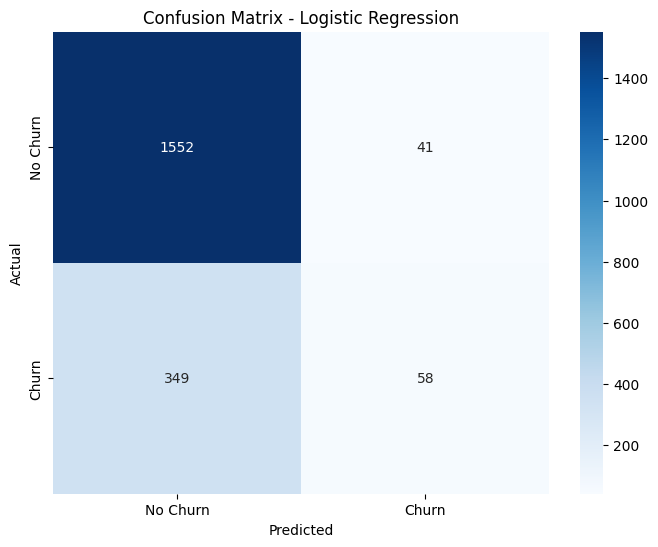

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



<ipython-input-7-6fbc69b27e35>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


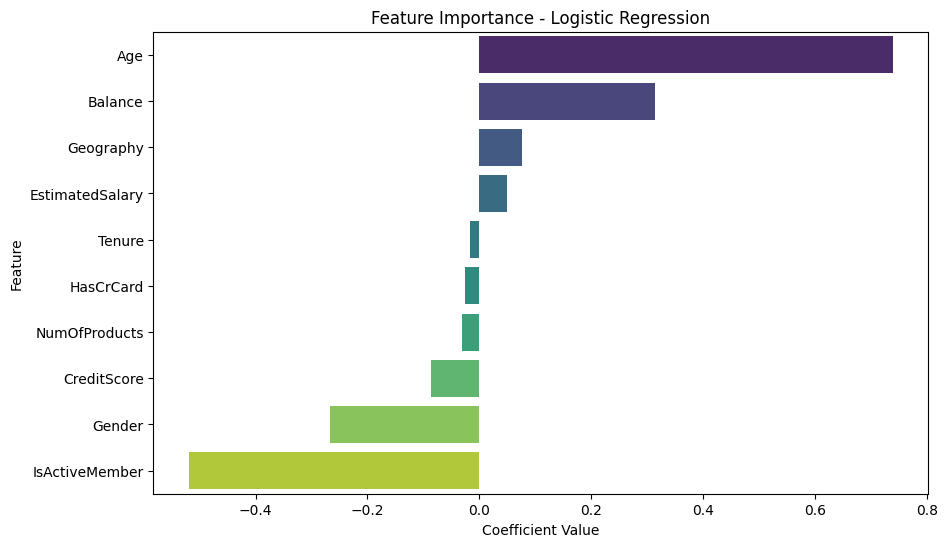

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report - Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


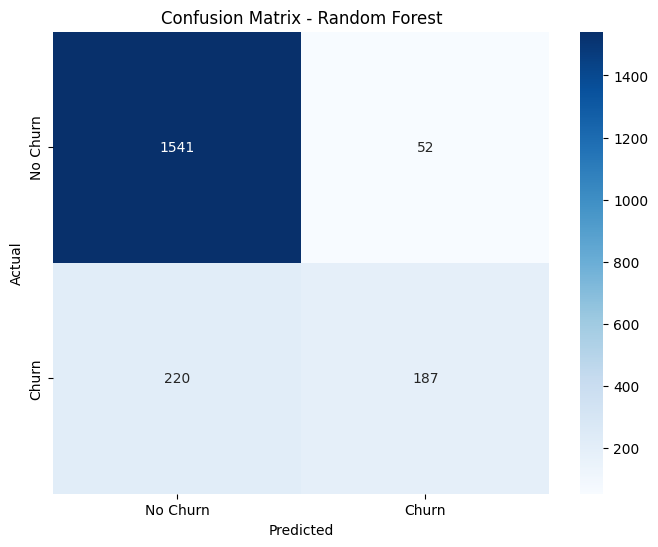

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



<ipython-input-9-6f41c0c82fc7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='coolwarm')


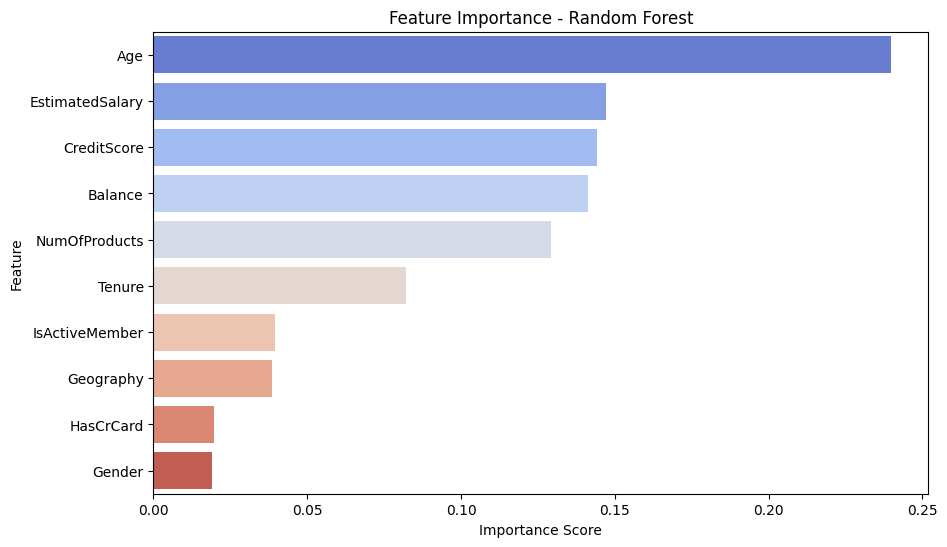

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='coolwarm')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
